# **first task

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.neighbors import KNeighborsClassifier

# чтоб картинки рисовались в тетрадке
%matplotlib inline 

In [3]:
data = pd.read_csv('D:/python_labs/adult.data.csv',sep=r',', skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Определите размерность данных: сколько наблюдений и сколько признаков

Сколько всего строк и столбцов:

In [4]:
data.shape


(32561, 15)

Список признаков
На источнике описание признаков скудное, но названия почти у всех признаков говорящие

In [122]:
print('\n'.join(data.columns.values.tolist()))

age
 workclass
 fnlwgt
 education
 education-num
 marital-status
 occupation
 relationship
 race
 sex
 capital-gain
 capital-loss
 hours-per-week
 native-country
 salary


Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?
Удалите наблюдения с пропущенными значениями

In [123]:
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

Вывод - нет пустых значений

Замена на нули

In [124]:
data.fillna(0)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Для каждого признака определите, к какому типу он относится. При необходимости, приведите признак к определенному вами типу.

In [125]:
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 salary            object
dtype: object

Поменяла тип

In [126]:
d = data.astype({"age": float})

In [127]:
d.dtypes

age                float64
 workclass          object
 fnlwgt              int64
 education          object
 education-num       int64
 marital-status     object
 occupation         object
 relationship       object
 race               object
 sex                object
 capital-gain        int64
 capital-loss        int64
 hours-per-week      int64
 native-country     object
 salary             object
dtype: object

приведение в более конкретный тип

In [128]:
data = data.infer_objects()
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 salary            object
dtype: object

Для категориальных признаков выведите список категорий

In [131]:
data.groupby('age').count()[['sex']]

,sex
age,
17,395
18,550
19,712
20,753
21,720
...,...
85,3
86,1
87,1


In [24]:
data.groupby('age').mean()[['hours-per-week']]

,hours-per-week
age,
17,21.367089
18,25.912727
19,30.678371
20,32.280212
21,34.034722
...,...
85,29.333333
86,40.000000
87,2.000000


In [28]:
data.groupby(['sex', 'race']).count()

age  workclass  fnlwgt  education  \
sex     race                                                       
 Female  Amer-Indian-Eskimo    119        119     119        119   
         Asian-Pac-Islander    346        346     346        346   
         Black                1555       1555    1555       1555   
         Other                 109        109     109        109   
         White                8642       8642    8642       8642   
 Male    Amer-Indian-Eskimo    192        192     192        192   
         Asian-Pac-Islander    693        693     693        693   
         Black                1569       1569    1569       1569   
         Other                 162        162     162        162   
         White               19174      19174   19174      19174   

                             education-num  marital-status  occupation  \
sex     race                                                             
 Female  Amer-Indian-Eskimo            119             119         119   
         Asian-Pac-Islander            346             346         346   
         Black                        1555            1555        1555   
         Other                         109             109         109   
         White                        8642            8642        8642   
 Male    Amer-Indian-Eskimo            192             192         192   
         Asian-Pac-Islander            693             693         693   
         Black                        1569            1569        1569   
         Other                         162             162         162   
         White                       19174           19174       19174   

                             relationship  capital-gain  capital-loss  \
sex     race                                                            
 Female  Amer-Indian-Eskimo           119           119           119   
         Asian-Pac-Islander           346           346           346   
         Black                       1555          1555          1555   
         Other                        109           109           109   
         White                       8642          8642          8642   
 Male    Amer-Indian-Eskimo           192           192           192   
         Asian-Pac-Islander           693           693           693   
         Black                       1569          1569          1569   
         Other                        162           162           162   
         White                      19174         19174         19174   

                             hours-per-week  native-country  salary  
sex     race                                                         
 Female  Amer-Indian-Eskimo             119             119     119  
         Asian-Pac-Islander             346             346     346  
         Black                         1555            1555    1555  
         Other                          109             109     109  
         White                         8642            8642    8642  
 Male    Amer-Indian-Eskimo             192             192     192  
         Asian-Pac-Islander             693             693     693  
         Black                         1569            1569    1569  
         Other                          162             162     162  
         White                        19174           19174   19174

In [31]:
data[data['hours-per-week'] >= 30].groupby(['sex', 'race']).count()

age  workclass  fnlwgt  education  \
sex     race                                                       
 Female  Amer-Indian-Eskimo     95         95      95         95   
         Asian-Pac-Islander    284        284     284        284   
         Black                1320       1320    1320       1320   
         Other                  89         89      89         89   
         White                6790       6790    6790       6790   
 Male    Amer-Indian-Eskimo    181        181     181        181   
         Asian-Pac-Islander    623        623     623        623   
         Black                1417       1417    1417       1417   
         Other                 155        155     155        155   
         White               17511      17511   17511      17511   

                             education-num  marital-status  occupation  \
sex     race                                                             
 Female  Amer-Indian-Eskimo             95              95          95   
         Asian-Pac-Islander            284             284         284   
         Black                        1320            1320        1320   
         Other                          89              89          89   
         White                        6790            6790        6790   
 Male    Amer-Indian-Eskimo            181             181         181   
         Asian-Pac-Islander            623             623         623   
         Black                        1417            1417        1417   
         Other                         155             155         155   
         White                       17511           17511       17511   

                             relationship  capital-gain  capital-loss  \
sex     race                                                            
 Female  Amer-Indian-Eskimo            95            95            95   
         Asian-Pac-Islander           284           284           284   
         Black                       1320          1320          1320   
         Other                         89            89            89   
         White                       6790          6790          6790   
 Male    Amer-Indian-Eskimo           181           181           181   
         Asian-Pac-Islander           623           623           623   
         Black                       1417          1417          1417   
         Other                        155           155           155   
         White                      17511         17511         17511   

                             hours-per-week  native-country  salary  
sex     race                                                         
 Female  Amer-Indian-Eskimo              95              95      95  
         Asian-Pac-Islander             284             284     284  
         Black                         1320            1320    1320  
         Other                           89              89      89  
         White                         6790            6790    6790  
 Male    Amer-Indian-Eskimo             181             181     181  
         Asian-Pac-Islander             623             623     623  
         Black                         1417            1417    1417  
         Other                          155             155     155  
         White                        17511           17511   17511

1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?

In [138]:
data['sex'].value_counts()['Female']

10771

2. Каков средний возраст (признак age) женщин?

In [142]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

3. Какова доля граждан Германии (признак native-country)?

In [152]:
 data['native-country'].value_counts()['Germany'] / len(data) * 100

0.42074874850281013

4. Постройте гистограмму распределения (bar plot) образования людей (признак education).

<AxesSubplot:>

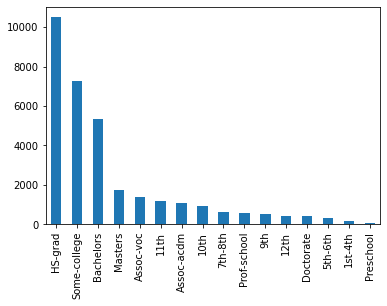

In [154]:
data['education'].value_counts().plot.bar()

In [ ]:
5. Каковы средние значения и среднеквадратичные отклонения возраста тех, 
кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [163]:
data[data['salary'] == '>50K']['age'].mean()

44.24984058155847

In [164]:
data[data['salary'] == '<=50K']['age'].mean()

36.78373786407767

In [165]:
data[data['salary'] == '>50K']['age'].std()

10.519027719851826

In [5]:
data[data['salary'] == '<=50K']['age'].std()

14.02008849082488

6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

Tip: Нужно написать код (может хватить и одного выражения), который проверяет выполнение условия и возвращает True если условие выполняется (т.е. ответ на вопрос - да, правда) и False иначе.


In [6]:
data[ (data['salary']    == '>50K')        & 
     ((data['education'] != 'Bachelors')   | 
      (data['education'] != 'Prof-school') | 
      (data['education'] != 'Assoc-acdm')  | 
      (data['education'] != 'Assoc-voc')   | 
      (data['education'] != 'Masters')     | 
      (data['education'] != 'Doctorate') )].shape[0] == 0

False


7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. 
Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.

Tip: Максимальный возраст мужчин расы Amer-Indian-Eskimo необходимо получить из таблицы,
полученной в результате использования методов groupby и describe. Почитайте про MultiIndex.

In [8]:
data.groupby(['race'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


In [9]:
data.groupby(['sex'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


In [12]:
data.groupby(['race'])['age'].describe()['max']['Amer-Indian-Eskimo']

82.0

8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [55]:
if (data[(data['salary'] == '>50K') & 
     (data['sex'] == 'Male')        & 
     ((data['marital-status'] == 'Married-civ-spouse')    | 
      (data['marital-status'] == 'Married-spouse-absent') | 
      (data['marital-status'] == 'Married-AF-spouse'))].shape[0] > 
    data[
        (data['salary'] == '>50K') & 
        (data['sex'] == 'Male'   ) & 
     ((data['marital-status'] != 'Married-civ-spouse'  )  |
     (data['marital-status'] != 'Married-spouse-absent')  | 
     (data['marital-status'] != 'Married-AF-spouse'))].shape[0]):
    print('married')
else:
    print('not married')

not married


9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?

In [58]:
data['hours-per-week'].max()

99

In [87]:
(data[ data['hours-per-week'] == 99 & (data['salary'] == '>50K')].shape[0] / data[data['hours-per-week'] == 99].shape[0]) * 100

2.3529411764705883

In [75]:
data[ data['hours-per-week'] == 99].shape[0]

85

10. Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

Tip: Необходимо построить barplot для каждой страны с разбивкой по признаку salary. Используйте crosstab. Пример графика:

In [93]:
data[data['salary'] == '>50K'].groupby(['native-country'])['hours-per-week'].mean()

native-country
?                     45.547945
Cambodia              40.000000
Canada                45.641026
China                 38.900000
Columbia              50.000000
Cuba                  42.440000
Dominican-Republic    47.000000
Ecuador               48.750000
El-Salvador           45.000000
England               44.533333
France                50.750000
Germany               44.977273
Greece                50.625000
Guatemala             36.666667
Haiti                 42.750000
Honduras              60.000000
Hong                  45.000000
Hungary               50.000000
India                 46.475000
Iran                  47.500000
Ireland               48.000000
Italy                 45.400000
Jamaica               41.100000
Japan                 47.958333
Laos                  40.000000
Mexico                46.575758
Nicaragua             37.500000
Peru                  40.000000
Philippines           43.032787
Poland                39.000000
Portugal              41.

<AxesSubplot:>

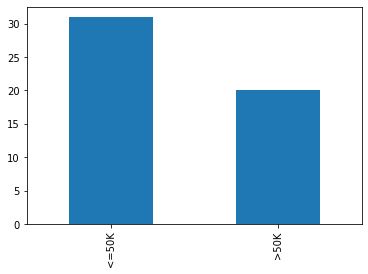

In [101]:
countries = data[data['native-country'] == 'Taiwan']['salary']
countries.plot.bar()

In [117]:
data.groupby(['native-country'])['salary'].value_counts()

native-country  salary
?               <=50K      437
                >50K       146
Cambodia        <=50K       12
                >50K         7
Canada          <=50K       82
                          ... 
United-States   >50K      7171
Vietnam         <=50K       62
                >50K         5
Yugoslavia      <=50K       10
                >50K         6
Name: salary, Length: 82, dtype: int64

In [1]:

df = pd.crosstab(data['salary'],data['native-country'])
df.plot.bar()

NameError: name 'pd' is not defined